# Recurrent Neural Networks

This is a simple recurrent neural network written with keras to predict output when given an input

In [8]:
# imports

from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [9]:
%tensorflow_version 2.x
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14790795922514812026
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14444920832
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16917325090326708712
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [11]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# 2 hidden units, 1 dense uit, 3 x 1 inout shape with linear actiavation and adam optimizer.
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

In [12]:
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[-0.37714112 -0.01099324]]  wh =  [[-0.9267539   0.37566897]
 [ 0.37566897  0.92675394]]  bh =  [0. 0.]  wy = [[-0.07590616]
 [ 1.1557051 ]] by =  [0.]


In [15]:
# get and spilt data

# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [16]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [19]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=90, batch_size=1, verbose=2)

Epoch 1/90
187/187 - 2s - loss: 0.0748 - 2s/epoch - 10ms/step
Epoch 2/90
187/187 - 1s - loss: 0.0125 - 1s/epoch - 7ms/step
Epoch 3/90
187/187 - 1s - loss: 0.0062 - 1s/epoch - 7ms/step
Epoch 4/90
187/187 - 1s - loss: 0.0044 - 1s/epoch - 7ms/step
Epoch 5/90
187/187 - 1s - loss: 0.0039 - 1s/epoch - 7ms/step
Epoch 6/90
187/187 - 1s - loss: 0.0037 - 1s/epoch - 7ms/step
Epoch 7/90
187/187 - 1s - loss: 0.0036 - 1s/epoch - 7ms/step
Epoch 8/90
187/187 - 1s - loss: 0.0037 - 1s/epoch - 7ms/step
Epoch 9/90
187/187 - 1s - loss: 0.0036 - 1s/epoch - 7ms/step
Epoch 10/90
187/187 - 1s - loss: 0.0036 - 1s/epoch - 7ms/step
Epoch 11/90
187/187 - 1s - loss: 0.0036 - 1s/epoch - 7ms/step
Epoch 12/90
187/187 - 1s - loss: 0.0036 - 1s/epoch - 7ms/step
Epoch 13/90
187/187 - 1s - loss: 0.0036 - 1s/epoch - 7ms/step
Epoch 14/90
187/187 - 1s - loss: 0.0036 - 1s/epoch - 7ms/step
Epoch 15/90
187/187 - 1s - loss: 0.0035 - 1s/epoch - 7ms/step
Epoch 16/90
187/187 - 1s - loss: 0.0035 - 1s/epoch - 7ms/step
Epoch 17/90
187/

In [20]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.058 RMSE
Test RMSE: 0.081 RMSE


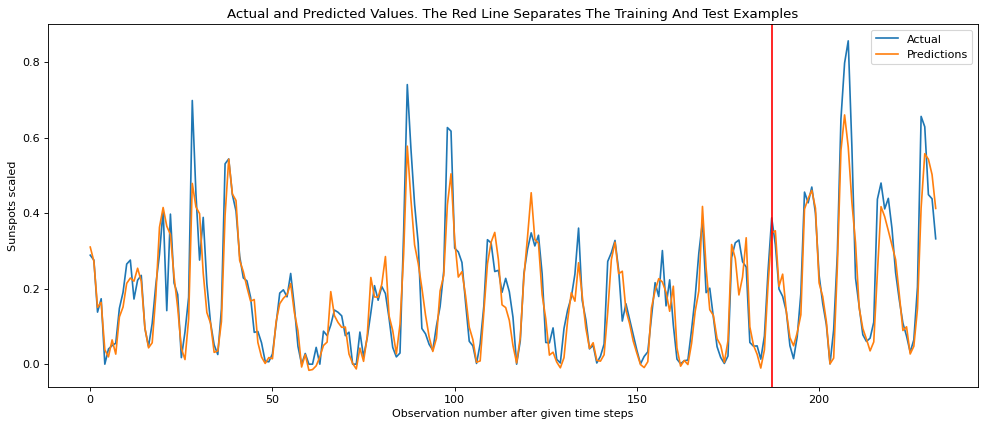

In [21]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)